This dataset was collected from the UCI Machine Learning Repository at the following link: https://archive.ics.uci.edu/dataset/1/abalone

The goal with this dataset is to predict the age of abalone shells based on secondary characteristics of the abalone. This, to an extent, is what is already done, but can be done more easily with a machine learning algorithm. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("abalone.data", header=None, names = ["Sex","Length","Diameter","Height","Whole weight","Schucked weight","Viscera weight","Shell weight","Rings"])

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole weight     4177 non-null   float64
 5   Schucked weight  4177 non-null   float64
 6   Viscera weight   4177 non-null   float64
 7   Shell weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As noted on the site, there are no missing objects which is great. The one thing that I will  want to change about this data set to get it ready for sci-kit learn is going to be converting Sex to a numeric column. After that, I will take a look at the distribution of the variables and see if scaling is requried

In [5]:
df = pd.get_dummies(data = df, columns=["Sex"])
df.head()

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


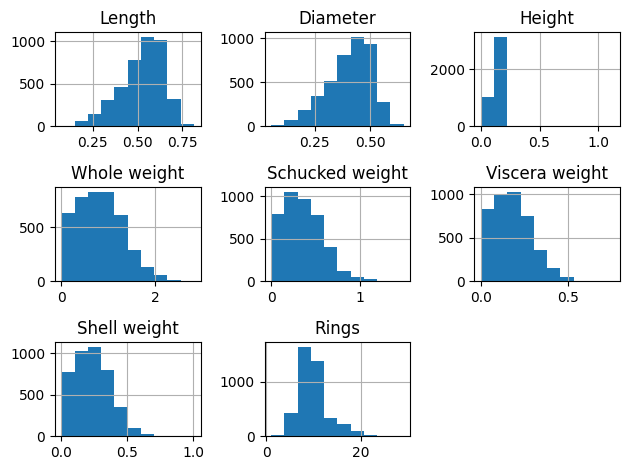

In [6]:
df.hist()
plt.tight_layout()
plt.show()

Looks like most of our data is fairly normal, or at has a right or left tail. Let's look at height a little more closely before moving on though

In [7]:
df["Height"].value_counts()

Height
0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.035      6
0.235      6
0.025      5
0.240      4
0.250      3
0.020      2
0.015      2
0.000      2
0.010      1
0.515      1
1.130      1
Name: count, dtype: int64

In [8]:
df_sorted = df.sort_values(by="Height", ascending=False).reset_index(drop=True)
df_sorted.head(10)

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.355,1.130,0.5940,0.3320,0.1160,0.1335,8,True,False,False
1,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,10,False,False,True
2,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,False,False,True
3,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14,True,False,False
4,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14,True,False,False
5,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350,13,False,False,True
6,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13,False,False,True
7,0.610,0.500,0.240,1.6420,0.5320,0.3345,0.6900,18,False,False,True
8,0.715,0.565,0.240,2.1995,0.7245,0.4650,0.8850,17,True,False,False
9,0.720,0.600,0.235,2.2385,0.9840,0.4110,0.6210,12,False,False,True


Okay seems like our major outliers in height are just two rows so we can drop those and move on with the rest of our scaling

In [9]:
df = df_sorted.loc[2:]
df

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
2,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,False,False,True
3,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14,True,False,False
4,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14,True,False,False
5,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350,13,False,False,True
6,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9,True,False,False
4173,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4,False,True,False
4174,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,False,True,False
4175,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8,False,True,False


In [10]:
sex_cols = ["Sex_F","Sex_I","Sex_M"]
for i in sex_cols:
    df[i] = df[i].map({False:0, True:1})

df

C:\Users\johnt\AppData\Local\Temp\ipykernel_5544\3734942057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map({False:0, True:1})


,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
2,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12,0,0,1
3,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14,1,0,0
4,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14,1,0,0
5,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350,13,0,0,1
6,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9,1,0,0
4173,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4,0,1,0
4174,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,0,1,0
4175,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8,0,1,0


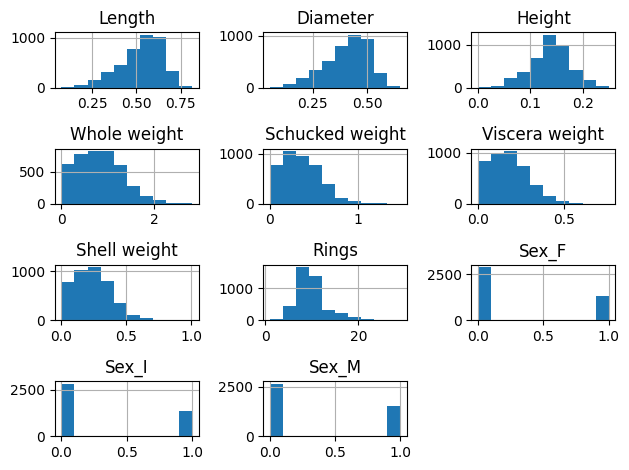

In [11]:
df.hist()
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

I want to scale only those columns which were not generated by the OneHotEncoder. I'll have to break those columns into a separate dataframe and then from there, scale the remaining columns and then reconcatenate the dataframes. If there's a better way to approach this in the future, please let me know!

In [13]:
sex_cols = df[["Sex_F","Sex_I","Sex_M"]].reset_index(drop=True)
sex_cols

,Sex_F,Sex_I,Sex_M
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4170,1,0,0
4171,0,1,0
4172,0,1,0
4173,0,1,0


In [14]:
to_scale = df.drop(["Sex_F","Sex_I","Sex_M"],axis=1).reset_index(drop=True)
to_scale

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings
0,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
1,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14
2,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14
3,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350,13
4,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13
...,...,...,...,...,...,...,...,...
4170,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
4171,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
4172,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
4173,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8


I also don't want to scale my target column so let me break that out now

In [15]:
y = df["Rings"]
y

2       12
3       14
4       14
5       13
6       13
        ..
4172     9
4173     4
4174     1
4175     8
4176     6
Name: Rings, Length: 4175, dtype: int64

In [16]:
to_scale = to_scale.drop(["Rings"],axis=1)
to_scale

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight
0,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780
1,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975
2,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450
3,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350
4,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015
...,...,...,...,...,...,...,...
4170,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885
4171,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050
4172,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015
4173,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150


In [17]:
scaled = pd.DataFrame(data = scaler.fit_transform(to_scale), columns = to_scale.columns)
scaled

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight
0,2.090739,2.238933,2.879357,3.981958,4.462623,5.290919,2.437802
1,2.423878,2.440508,2.879357,2.911480,2.396647,2.186478,4.015286
2,0.591612,0.626331,2.879357,0.927678,0.463740,0.611431,1.481968
3,1.008036,1.079875,2.619512,1.455263,0.504338,1.720812,2.128773
4,1.674315,1.684601,2.619512,2.819638,4.473901,2.122563,1.888018
...,...,...,...,...,...,...,...
4170,0.924751,0.878300,-3.226988,0.669498,0.687028,1.163838,0.357247
4171,-2.989637,-2.951627,-3.226988,-1.661266,-1.595470,-1.621028,-1.680187
4172,-3.739200,-3.556353,-3.356911,-1.686778,-1.615769,-1.643855,-1.705341
4173,-0.782588,-0.683907,-3.616755,-0.817334,-0.688786,-0.863179,-0.889649


In [18]:
X = pd.concat([scaled,sex_cols],axis=1)
X

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,2.090739,2.238933,2.879357,3.981958,4.462623,5.290919,2.437802,0,0,1
1,2.423878,2.440508,2.879357,2.911480,2.396647,2.186478,4.015286,1,0,0
2,0.591612,0.626331,2.879357,0.927678,0.463740,0.611431,1.481968,1,0,0
3,1.008036,1.079875,2.619512,1.455263,0.504338,1.720812,2.128773,0,0,1
4,1.674315,1.684601,2.619512,2.819638,4.473901,2.122563,1.888018,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4170,0.924751,0.878300,-3.226988,0.669498,0.687028,1.163838,0.357247,1,0,0
4171,-2.989637,-2.951627,-3.226988,-1.661266,-1.595470,-1.621028,-1.680187,0,1,0
4172,-3.739200,-3.556353,-3.356911,-1.686778,-1.615769,-1.643855,-1.705341,0,1,0
4173,-0.782588,-0.683907,-3.616755,-0.817334,-0.688786,-0.863179,-0.889649,0,1,0


Now that our data is scaled let's double check that everything looks good with some histograms

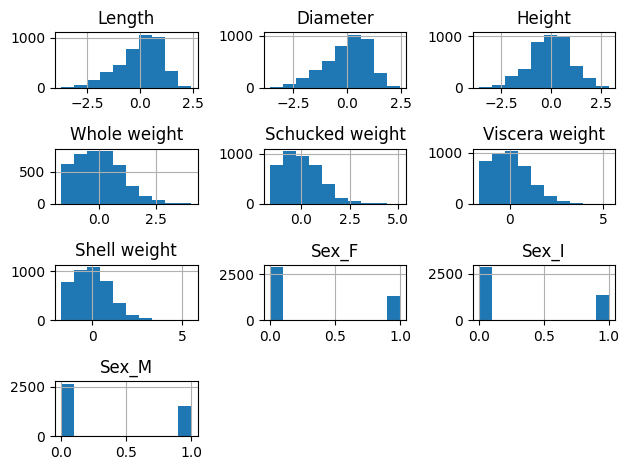

In [19]:
X.hist()
plt.tight_layout()
plt.show()

Great! Now we'll move on to some model selection

In [20]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25,random_state=42)

In [21]:
X_train

,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2665,-0.699303,-0.583119,-0.368699,-0.760187,-0.672998,-0.776437,-0.774661,0,1,0
4084,-1.657079,-1.590995,-2.187610,-1.352063,-1.277454,-1.182754,-1.392719,0,1,0
2550,-0.366164,-0.280757,-0.238777,-0.430574,-0.267020,-0.351859,-0.458445,0,0,1
1803,0.758181,0.676725,0.280912,0.426625,0.526892,0.474470,0.317720,0,0,1
247,1.549387,1.634207,1.450212,1.060339,2.432734,2.401049,1.543055,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3444,-1.490509,-1.540601,-1.018310,-1.288793,-1.300008,-1.182754,-1.284918,1,0,0
466,1.049678,1.180663,1.190368,1.346072,1.379446,1.428629,1.000458,0,0,1
3092,-0.491091,-0.532726,-0.628544,-0.730594,-0.738406,-0.570996,-0.810595,1,0,0
3772,-1.323940,-1.389420,-1.408077,-1.308182,-1.254900,-1.264930,-1.299291,0,1,0


In [22]:
y_train

2667     8
4086     5
2552    12
1805     9
249     11
        ..
3446     9
468     11
3094     7
3774     6
862     11
Name: Rings, Length: 3131, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

Above, I've imported two models that I'm familiar with and that have done well in projects that I've done in the past. I've also decided to try a new classifier. I chose to bring in the SGDClassifier based off the sci-kit learn "Machine Learning Map" which can be found here: https://scikit-learn.org/stable/tutorial/machine_learning_map/
I'm excited to try out a new model, see what hyperparameters it has,and how it functions/performs. I'll be taking a quick read of the documentation on sklearn and then doing some research online to see what I can find. Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


As usual, John Starmer of StatQuest fame was an invaluable, concise (as can be), and clear resource. I'll link the videos that I watched below for anyone interested:
- https://www.youtube.com/watch?v=sDv4f4s2SB8
- https://www.youtube.com/watch?v=vMh0zPT0tLI
- https://www.youtube.com/watch?v=UmathvAKj80
Note: The last video is a small visualization and is not by our StatQuest guide. It is however, a very concise, if somewhat incomplete, explanation of how Stochastic Gradient Descent differs from "Vanilla" Gradient Descent and was also a good watch

In [30]:
rf = RandomForestClassifier()
knc = KNeighborsClassifier()
sgd = SGDClassifier()

In [36]:
models=[rf,knc,sgd]
sgd_hyper = {
    "loss":['hinge','log-loss','modified_huber'],
    "penalty":['l2','l1'],
    "learning_rate":['constant','optimal'],
    "random_state":42
}
rf_hyper = {
    "n_estimators": [50,100,150,200],
    "max_features": ['sqrt','log2'],
    "max_depth": [3,5,10]
}
knc_hyper = {
    "n_neighbors":np.arange(2,30,3)
}
params = [rf_hyper,knc_hyper,sgd_hyper]

In [32]:
from sklearn.model_selection import GridSearchCV

Given the nature of how I now know SGD actually works, I was tempted to use RandomSearchCV instead, but I've got time and my electricity bill is already included in rent so might as well

In [ ]:
gs = GridSearchCV()
def comp_best_clf(models,params):
    
    for i in range(len(models)):
        models[i]+"_gs" = gs(estimator=models[i],param_grid=params[i])
best_clf = comp_best_clf(models,params)